In [1]:
### Figure 3C for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
import matplotlib.font_manager as font_manager


%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
# Import the Hela DMEM gene level profiles & hits from the hit calling process then subset the gene level profiles for all hits 
df = pd.read_csv('../20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS_plate_level_gene_aggregated.csv.gz').set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
comp_spef_hits = pd.read_csv('../Fig3_A_B/cp257_dmem_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
whole_cell_hits = pd.read_csv('../Fig3_A_B/cp257_dmem_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv').rename(columns={'Unnamed: 0':'Gene'}).set_index('Gene')
hit_list = list(comp_spef_hits.index) + list(whole_cell_hits.index)
df_hits = df.loc[hit_list]
df_hits

,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
A4GALT,-0.003687,-0.001517,-0.024211,-0.002230,-0.000985,0.048217,-0.247624,-0.385445,-0.181542,-0.310485,...,-0.205460,-0.124003,-0.061160,-0.064534,-0.158805,-0.175165,-0.100943,-0.116820,-0.127088,-0.208700
AADAT,0.010149,-0.050984,-0.000033,-0.011308,0.000147,-0.390320,0.192267,0.127596,0.360045,-0.037015,...,0.035560,0.096781,0.002351,0.014290,-0.047730,-0.055333,-0.027467,-0.030975,-0.054734,-0.066406
AAGAB,0.001373,-0.073191,0.005038,-0.008009,-0.000422,-0.110842,0.408275,0.010436,0.014049,-0.013480,...,-0.364305,-0.374600,-0.045733,-0.048909,-0.093886,-0.073781,-0.127453,-0.269980,0.009450,-0.024553
AARSD1,0.011580,-0.099327,-0.017418,0.022201,0.004731,-0.048940,-0.060862,-0.170685,-0.057970,-0.051002,...,-0.251240,-0.230710,-0.123475,-0.036832,-0.078641,-0.171565,-0.146525,-0.317805,-0.210240,-0.273045
AASDHPPT,0.010061,-0.008188,0.016220,-0.005553,0.001298,-0.359410,-0.452070,-0.113907,0.367390,-0.194975,...,-0.160485,-0.184115,-0.156485,-0.030092,-0.156475,-0.236350,-0.165520,-0.378370,-0.270330,-0.201435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZP3,0.002234,0.023157,0.012874,0.013057,0.000447,-0.268155,-0.032118,-0.136975,0.203412,-0.126557,...,-0.166314,-0.231420,-0.150015,-0.063093,-0.058868,-0.073555,-0.056141,-0.257935,-0.285295,-0.359115
ZPR1,0.000413,-0.015735,-0.015433,0.001812,-0.000215,-0.551765,-0.001942,0.403800,0.569805,-0.217560,...,0.242875,0.536345,0.335195,0.045955,-0.013645,0.059679,-0.001273,0.092637,-0.032070,-0.005467
ZSWIM8,0.008489,0.287793,-0.001380,0.012269,0.002484,-0.070610,-0.190660,-0.032445,-0.026930,-0.222235,...,-0.109120,0.011316,0.010509,0.018169,-0.121815,-0.111510,-0.119964,-0.045433,0.318355,-0.044189


In [3]:
# Calculate correlation between all gene pairs and create a dictionory of gene pairs/correlation
df_hits_corr = df_hits.T.corr()
genes = list(df_hits_corr.index)
corr_dic = {}
for gene1 in genes:
    for gene2 in genes:
        if len(frozenset([gene1,gene2])) == 1 :
            continue
        else:    
            corr_dic[frozenset([gene1,gene2])]=(df_hits_corr.loc[gene1,gene2])
        
print(len(corr_dic))

10953540


In [4]:
# Input the protein clusters from the CORUM3.0 database and subset the human clusters
ppi_data = pd.read_csv('../Input_files/allComplexes 2.txt',sep = '\t')
ppi_data_h = ppi_data[ppi_data['Organism'] == "Human"]
ppi_data_h

,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,GO description,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,DNA topological change;negative regulation of ...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7
3,4,Multisubunit ACTR coactivator complex,Human,None,None,Q09472;Q92793;Q92831;Q9Y6Q9,2033;1387;8850;8202,MI:0004-affinity chromatography technologies;M...,GO:0045893;GO:0023052;GO:0005634,"positive regulation of transcription, DNA-temp...",11.02.03.04.01;30.01;70.10,transcription activation;cellular signalling;n...,EP300;CREBBP;KAT2B;NCOA3,None,9267036,Cofactor ACTR binds directly nuclear receptors...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"P300;CBP;PCAF;AIB1, BHLHE42, RAC3, TRAM1, ACTR",Histone acetyltransferase p300;CREB-binding pr...
5,10,Condensin I complex,Human,13S condensin complex,None,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,10592;23397;9918;64151;10051,MI:0004-affinity chromatography technologies;M...,GO:0000279;GO:0007067;GO:0030261;GO:0007059;GO...,M phase;mitotic nuclear division;chromosome co...,10.03.01.01.11;10.03.04.03;10.03.04.05;42.10.0...,M phase;chromosome condensation;chromosome seg...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,None,11136719,None,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,CAPE SMC2L1;BRRN BRRN1 CAPH KIAA0074;CAPD2 CNA...,Structural maintenance of chromosomes protein ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,7586,FOXO1-ESR1 complex,Human,FKHR-ESRA complex,human hepatocyte carcinoma HepG2 cells; MCF-7 ...,P03372;Q12778,2099;2308,MI:0096-pull down;MI:0018-two hybrid,GO:0035257;GO:0030331,nuclear hormone receptor binding;estrogen rece...,None,None,ESR1;FOXO1,None,11353774,FKHR interacts with ERalpha in an E2-dependent...,None,Homo sapiens (Human);Homo sapiens (Human),"ESRA, NR3A1;FKHR, FOXO1A",Estrogen receptor;Forkhead box protein O1
4268,7587,APP(AICD)-FOXO3 complex,Human,APP(AICD)-FOXO3a complex,HEK 293T cells; SY-SH5Y cells,O43524;P05067,2309;351,MI:0019-coimmunoprecipitation,GO:0005737;GO:0008219;GO:0006979;GO:0005634;GO...,cytoplasm;cell death;response to oxidative str...,70.03;40.10;32.01.01;70.10;40.10.02,cytoplasm;cell death;oxidative stress response...,FOXO3;APP,AICD is a small APP intracellular domain.,24832605,"In human cells, AICD physically interacts with...",None,Homo sapiens (Human);Homo sapiens (Human),"FKHRL1, FOXO3A;

In [5]:
# Create a list of protein clusters with all complexes that had at least 66% of genes represented within the Hela DMEM WGS hits
cluster_count = 0
hit_cluster_list_list = []
hit_set = set()
for i in range(len(ppi_data_h)):
    cluster = ppi_data_h.iloc[i]['subunits(Gene name)'].split(';')
    count = 0
    hit_cluster_list = []
    for g in cluster:
        if g in genes:
            count += 1
            hit_set.add(g)
            hit_cluster_list.append(g)
    if (count/len(cluster)) >= 0.66:
        cluster_count += 1
    if hit_cluster_list and (count/len(cluster)) >= 0.66:
        hit_cluster_list_list.append(hit_cluster_list)
print(len(hit_set),cluster_count,len(hit_cluster_list_list))

1450 744 744


In [6]:
# Assign correlations to hit gene pairs
hit_pair_set = set()
for l in hit_cluster_list_list:
    for c in list(permutations(l,2)):
        hit_pair_set.add(frozenset(c))

hit_corr_dic = {}
for s in hit_pair_set:
    hit_corr_dic[s] = corr_dic[s]

print(' Number of hit pairs',len(hit_pair_set),'\n',
      'Number of hit pairs with correlation',len(hit_corr_dic))

 Number of hit pairs 5822 
 Number of hit pairs with correlation 5822


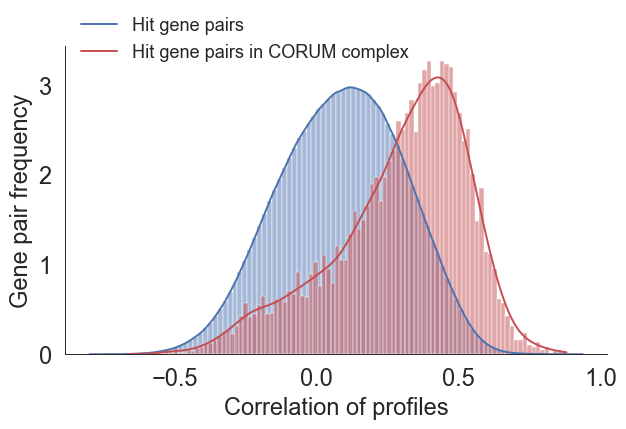

In [7]:
# Plot CORUM gene pair correlation distribution for Fig 3C
sns.set_theme(style="white",rc = {'axes.linewidth': 0.7,'xtick.labelsize':17,'ytick.labelsize':17})


fig, ax = plt.subplots(figsize=(7,4))

all_corr = list(corr_dic.values())
cluster_corr = list(hit_corr_dic.values())

sns.histplot(all_corr ,color='b' ,stat= 'percent' ,bins= 100, kde=True, line_kws={'lw':1.4} , alpha=0.5,ax = ax);
sns.histplot(cluster_corr ,color='r' ,stat= 'percent' ,bins= 100, kde=True, line_kws={'lw':1.4} ,alpha=0.5,ax = ax);


ax.set_ylabel('Gene pair frequency',size=17)
ax.set_xlabel('Correlation of profiles',size=17)

font = font_manager.FontProperties(size=13)
ax.legend(['Hit gene pairs','Hit gene pairs in CORUM complex'],loc='upper left',bbox_to_anchor=(0.0,1.15),frameon=False,prop=font )

sns.despine(top = True)



fig.savefig('Fig3_C_Hela_DMEM_CORUM_gene_pair_correlation_distribution.png', dpi=300,facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()